Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

Mount personal Google Drive folder

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


1. Download the dataset from [Kaggle](https://www.kaggle.com/datasets/meetnagadia/netflix-stock-price-data-set-20022022/)

2. Put the dataset into personal google drive folder
3. Read the dataset from Google Drive Folder
4. Do not consider the first 4000 lines

In [5]:
df = pd.read_csv('/content/gdrive/MyDrive/Links Accademy - AI/1. Anomaly detection/data/NFLX.csv')
df = df.iloc[4000:,:]

Check dataset features Dtype

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 4000 to 5043
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1044 non-null   object 
 1   Open       1044 non-null   float64
 2   High       1044 non-null   float64
 3   Low        1044 non-null   float64
 4   Close      1044 non-null   float64
 5   Adj Close  1044 non-null   float64
 6   Volume     1044 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 57.2+ KB


Convert columns with dates into datetime fields

In [5]:
df['Date']=pd.to_datetime(df['Date'])
df

,Date,Open,High,Low,Close,Adj Close,Volume
4000,2018-04-13,317.290009,317.489990,308.230011,311.649994,311.649994,12046600
4001,2018-04-16,315.989990,316.100006,304.000000,307.779999,307.779999,20307900
4002,2018-04-17,329.660004,338.619995,323.769989,336.059998,336.059998,33866500
4003,2018-04-18,336.299988,338.820007,331.100006,334.519989,334.519989,11221100
4004,2018-04-19,332.880005,335.309998,326.769989,332.700012,332.700012,8438800
...,...,...,...,...,...,...,...
5039,2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000
5040,2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500
5041,2022-06-01,198.699997,202.740005,191.660004,192.910004,192.910004,8416200
5042,2022-06-02,192.020004,205.470001,191.720001,205.089996,205.089996,9623100


Plot 'Open' feature

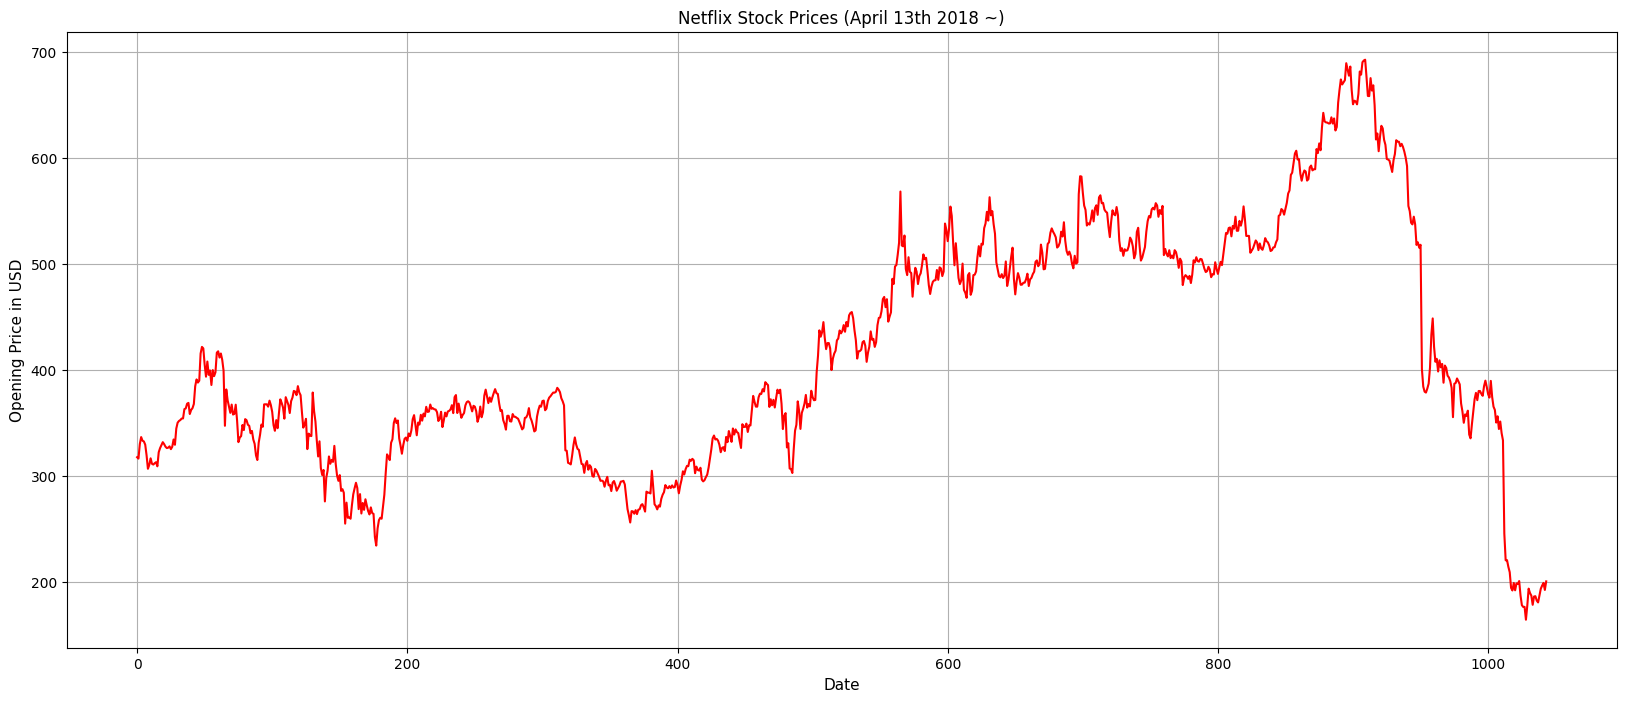

In [10]:
fig, ax = plt.subplots(figsize=(20,8))
plt.plot(df["Date"], df["Open"], color='Red')
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Opening Price in USD', fontsize='11')
plt.title('Netflix Stock Prices (April 13th 2018 ~)')
plt.grid()
plt.show()

## Data preproccessing

Drop unuseful columns

In [7]:
df = df.drop(columns=['High','Low','Close','Volume','Adj Close'])

Delete date information

In [9]:
for i in range(len(df)):
    df['Date'][i+4000] = i
df

<ipython-input-9-355a7cee26a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'][i+4000] = i


,Date,Open
4000,0,317.290009
4001,1,315.989990
4002,2,329.660004
4003,3,336.299988
4004,4,332.880005
...,...,...
5039,1039,193.190002
5040,1040,196.179993
5041,1041,198.699997
5042,1042,192.020004


# KNN


KNN is a supervised learning-based algorithm.
However, using KNN's distance calculation method can also be used as an unsupervised learning method.

In this work, we will use Scikit-Learn's NearestNeighbors, which we can use it for unsupervised learning



sklearn.neighbors.NearestNeighbors

    class sklearn.neighbors.NearestNeighbors(*, n_neighbors=5, radius=1.0, algorithm='auto', leaf_size=30, metric='minkowski', p=2, metric_params=None, n_jobs=None)

- n_neighbors : int, default=5 (Number of neighbors to use by default for kneighbors queries.)
- radius : float, default=1.0 (Range of parameter space to use by default for radius_neighbors queries.)
- algorithm : {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’ (Algorithm used to compute the nearest neighbors)
- metric : str or callable, default=’minkowski’ (the distance metric to use for the tree.)
- p : int, default=2 (Parameter for the Minkowski metric from sklearn.metrics.pairwise.pairwise_distances. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.)



Use a KNN model with:
- 10 neighbors
- radius 1
- "auto" algorithm
- minkowski distances (euclidean)

In [11]:
nbrs = NearestNeighbors(n_neighbors = 10)
nbrs.fit(df)

NearestNeighbors(n_neighbors=10)

Distances and indexes of k-neaighbors from model outputs


In [21]:
distances, indexes = nbrs.kneighbors(df)

Plot distances

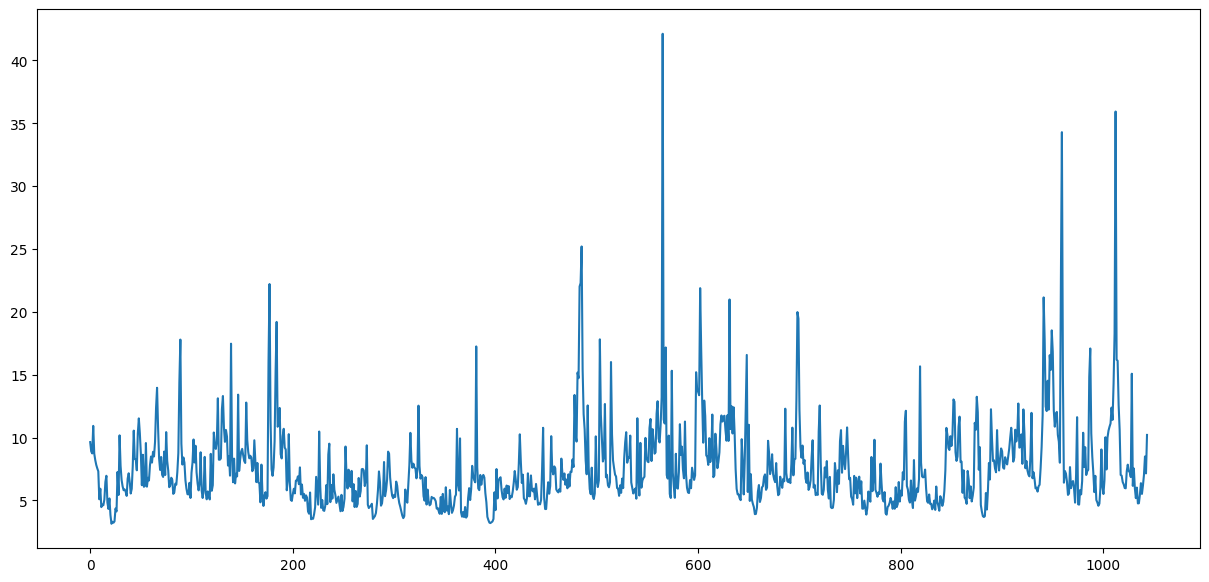

In [22]:
plt.figure(figsize=(15, 7))
plt.plot(distances.mean(axis =1))

Calculate distances mean for each data point

In [13]:
distances = pd.DataFrame(distances)
distances_mean = distances.mean(axis =1)
distances_mean

0        9.639025
1        8.904911
2        8.737343
3       10.929187
4        8.726872
          ...    
1039     6.194330
1040     7.029236
1041     8.495861
1042     7.150375
1043    10.210480
Length: 1044, dtype: float64

## Get Outlier Points

In [14]:
distances_mean.describe()

count    1044.000000
mean        7.596230
std         3.464726
min         3.141603
25%         5.477684
50%         6.759018
75%         8.652536
max        42.124776
dtype: float64

Create a threshold (static or dynamic) and check what (average) distance is beyond it

In [18]:
th = 13.0
outlier_index = np.where(distances_mean > th)
outlier_index

(array([  66,   88,   89,  126,  131,  139,  146,  176,  177,  183,  184,
         381,  478,  481,  482,  483,  484,  485,  486,  503,  514,  564,
         565,  568,  574,  598,  599,  600,  601,  602,  603,  631,  648,
         698,  699,  819,  852,  875,  941,  942,  945,  947,  948,  949,
         950,  958,  959,  960,  986,  987, 1010, 1011, 1012, 1013, 1014,
        1028]),)

In [19]:
outlier_values = df.iloc[outlier_index]
outlier_values

,Date,Open
4066,66,381.239990
4088,88,319.010010
4089,89,314.640015
4126,126,324.940002
4131,131,360.670013
4139,139,275.570007
4146,146,328.000000
4176,176,242.000000
4177,177,233.919998
4183,183,281.880005


Plot data with anomalies in red

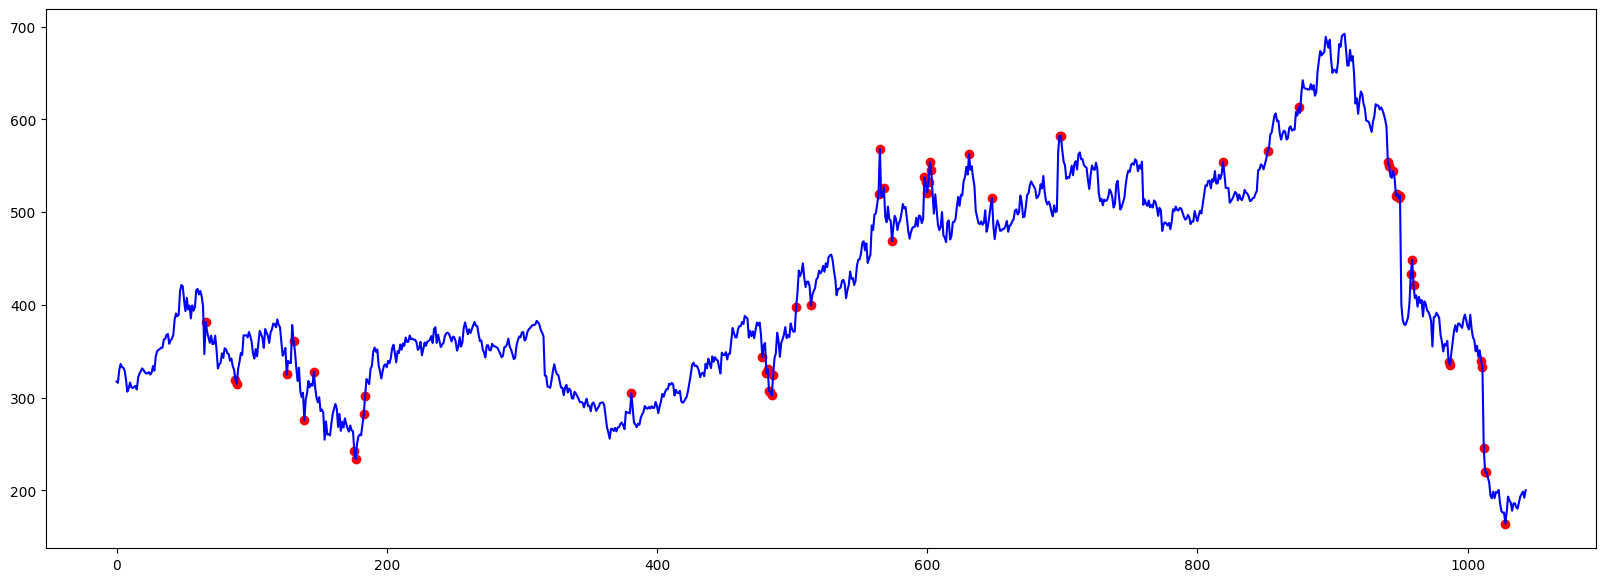

In [20]:
plt.figure(figsize=(20, 7))
plt.plot(df["Date"], df["Open"], color = "b")

# plot outlier values
plt.scatter(outlier_values["Date"], outlier_values["Open"], color = "r")